# Color Compression

* Using KMeans algorithm we are to compress the colors of an image and see the result

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import cv2

###### Loading the image flower.jpg

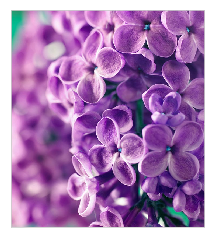

In [2]:
# from sklearn.datasets import load_sample_image
flower = cv2.imread("img01.jpg")
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(flower)

In [3]:
flower.shape

(810, 720, 3)

Here the dimension is 427/640 pixels, and there are 3 layers of color i.e, rgb

In [4]:
flower[10]

array([[ 36, 157, 113],
       [ 34, 157, 113],
       [ 35, 156, 112],
       ...,
       [155,  88, 163],
       [160,  93, 168],
       [163,  96, 171]], dtype=uint8)

Now the data is very large, so to normalize them into the scale of 0-1, dividing  the data by 255 will do

In [5]:
data = flower/255
data.shape

(810, 720, 3)

In [6]:
data[10]

array([[0.14117647, 0.61568627, 0.44313725],
       [0.13333333, 0.61568627, 0.44313725],
       [0.1372549 , 0.61176471, 0.43921569],
       ...,
       [0.60784314, 0.34509804, 0.63921569],
       [0.62745098, 0.36470588, 0.65882353],
       [0.63921569, 0.37647059, 0.67058824]])

In [8]:
data = data.reshape(810*720,3)
data.shape

(583200, 3)

In [9]:
def plot_pixels(data, title, colors=None):
#     colors = data if colors==None else 1
    if colors is None:colors = data
    
    #choosing a random subset
    rand = np.random.RandomState(0)
    i = rand.permutation(data.shape[0])[:1000]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color = colors, marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,color = colors, marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=25)

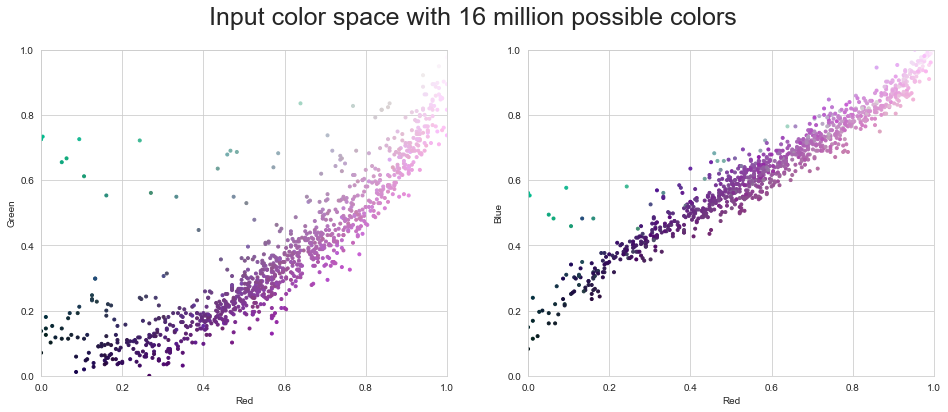

In [10]:
plot_pixels(data, title = 'Input color space with 16 million possible colors')

###### Using a KMeans algorithm

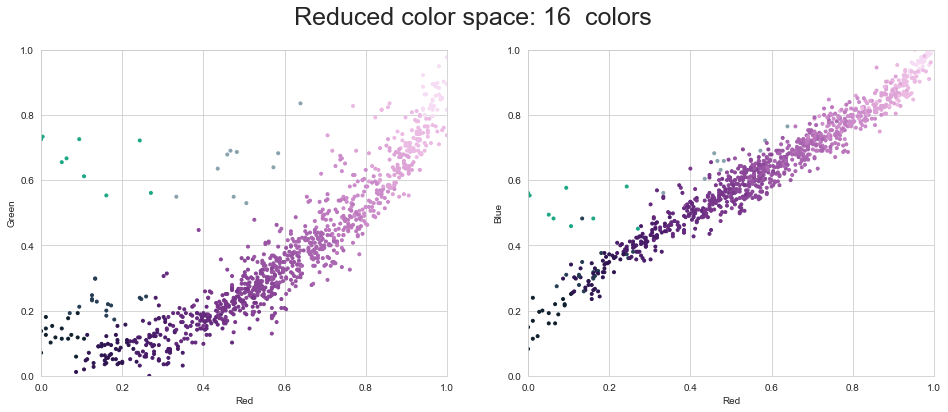

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(16)
y_data = kmeans.fit_predict(data)
new_colors = kmeans.cluster_centers_[y_data]
plot_pixels(data, title = 'Reduced color space: 16  colors',colors = new_colors)

###### Using more faster KMeans algorithm: MiniBatchKMeans

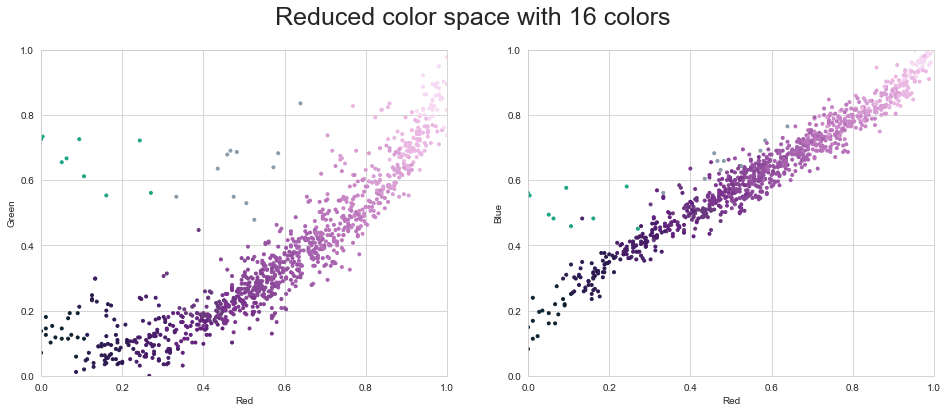

In [19]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
y_data = kmeans.fit_predict(data)
new_colors = kmeans.cluster_centers_[y_data]
plot_pixels(data, title = 'Reduced color space with 16 colors',colors = new_colors)

Text(0.5,1,'16-color Image')

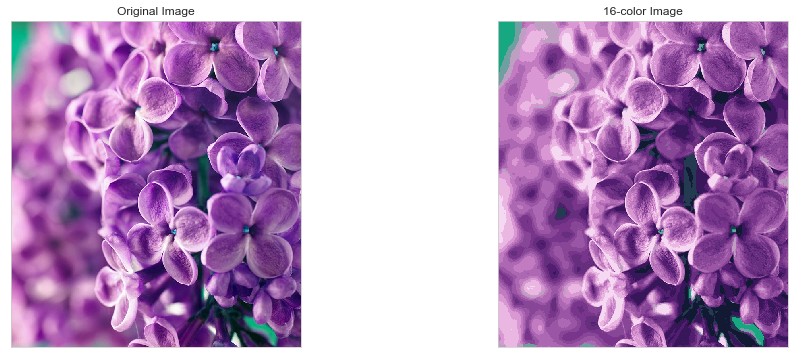

In [13]:
new_flower = new_colors.reshape(flower.shape)

fig,ax = plt.subplots(1,2,figsize=(16,6), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(flower)
ax[0].set_title('Original Image')
ax[1].imshow(new_flower)
ax[1].set_title('16-color Image')

In [18]:
cv2.imwrite('img02.jpg',new_flower*255)

True